# Skin Disease Classifier using Convolutional Neural Networks (CNN)

##### This project implements a deep learning image classification model to detect various skin diseases using Convolutional Neural Networks (CNNs). The dataset consists of categorized skin images, and we build a robust image preprocessing and training pipeline using TensorFlow, Keras and the power of Transfer Learning.

---

## Objective

- ##### Build a multi-class image classifier for skin diseases.
- ##### Use image preprocessing and augmentation for model generalization.
- ##### Train a CNN to classify medical images into appropriate categories.

##### We will be creating our dataset from the SD-198 Dataset which contains over 6000+ images belonging to 198 skin conditions. However, our model/app needs to be more general purpose and something people (and general practitioners) can use in day-to-day life. 

#### So we will focus only on most common conditions that people face and thus eliminate and combine most of the classes to create our unique dataset

---


### 1. Importing Libraries

##### We begin by importing essential Python libraries for data handling, image processing, and building deep learning models./

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Let's download the SD-198 dataset from Kaggle.

##### This model was developed in Google Colab. We will get the API key from Kaggle and use the JSON file to download the dataset, then unzip it.

In [ ]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadadamumar","key":"2a26190e5b3c4fa03768c7964a57171d"}'}

In [ ]:
!kaggle datasets download -d longngzzz/sd-198

Dataset URL: https://www.kaggle.com/datasets/longngzzz/sd-198
License(s): unknown
100% 885M/885M [00:09<00:00, 99.7MB/s]
100% 885M/885M [00:09<00:00, 97.4MB/s]


In [ ]:

!unzip /content/drive/MyDrive/sd-198-sorted.zip -d sd-198-sorted

Streaming output truncated to the last 5000 lines.
  inflating: sd-198-sorted/sd-198-sorted/Carcinoma/aug_262.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Carcinoma/aug_258.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Carcinoma/aug_263.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Dermatofibroma/aug_284.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Dermatofibroma/aug_282.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Skin_Tag/aug_291.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Carcinoma/aug_260.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Dermatofibroma/aug_281.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Skin_Tag/aug_292.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Skin_Tag/aug_138.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Dermatofibroma/aug_283.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Skin_Tag/aug_139.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Skin_Tag/aug_133.jpg  
  inflating: sd-198-sorted/sd-198-sorted/Skin_Tag/aug_137.jpg  
  inflating: sd-198-sorte

##### Checking contents


In [ ]:
import os

# Check contents
for dirpath, dirnames, filenames in os.walk("sd-198"):
    print(f"{dirpath} has {len(dirnames)} folders and {len(filenames)} files")
    break

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### We will choose our classes by first identifying the most frequent conditions in our dataset.

In [ ]:
import os
from collections import Counter

dataset_dir = "/content/sd-198" 

class_counts = {}
for class_folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(folder_path):
        image_count = len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_folder] = image_count

top_10_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

for cls, count in top_10_classes:
    print(f"{cls}: {count} images")

Stasis_Edema: 60 images
Perioral_Dermatitis: 60 images
Actinic_solar_Damage(Actinic_Keratosis): 60 images
Basal_Cell_Carcinoma: 60 images
Rhinophyma: 60 images
Nevus_Incipiens: 60 images
Actinic_solar_Damage(Pigmentation): 60 images
Dysplastic_Nevus: 60 images
Tinea_Versicolor: 60 images
Pityrosporum_Folliculitis: 60 images
Rosacea: 60 images
Stasis_Dermatitis: 60 images
Actinic_solar_Damage(Solar_Elastosis): 60 images
Blue_Nevus: 60 images
Acne_Vulgaris: 60 images
Keratoacanthoma: 60 images
Allergic_Contact_Dermatitis: 60 images
Congenital_Nevus: 60 images
Skin_Tag: 60 images
Ichthyosis: 60 images
Inverse_Psoriasis: 60 images
Tinea_Manus: 60 images
Onychomycosis: 60 images
Alopecia_Areata: 60 images
Malignant_Melanoma: 60 images
Seborrheic_Keratosis: 60 images
Pyogenic_Granuloma: 60 images
Sebaceous_Gland_Hyperplasia: 60 images
Epidermoid_Cyst: 60 images
Compound_Nevus: 60 images
Cutaneous_Horn: 60 images
Dermatofibroma: 60 images
Psoriasis: 60 images
Tinea_Faciale: 60 images
Stasis_U

### 2. Choosing effective classes


##### We combine the most frequent classes in the dataset with most common skin diseases by numbers that can be observed at the following [URL](https://www.aad.org/media/stats-numbers?).
##### How the conditions we chose matter globally?

- ##### Acne Vulgaris
Affects around 9–10% of the global population, about 633 million people in 2015 according to Wiley Online Library

- ##### Eczema (Atopic Dermatitis / Dermatitis)
Affects 2–10% of adults globally and up to 20% of children according to National Eczema Association


- ##### Psoriasis
Affects 2–4% of the population, about 7.5 million people in the U.S. alone according to Wikipedia

- ##### Rosacea
Covers 1–10% of people globally, especially common in fair-skinned groups aged 30–50 according to Wikipedia

- ##### Alopecia is leading cause of hairfall according to AAD

##### Therefore the 14 classes we chose for our classifier (including a Healthy class) are:

1. ##### 'eczema',
2. ##### 'keratosis',
3. ##### 'psoriasis',
4. ##### 'tag',
5. ##### 'acne',
6. ##### 'dermatitis',
7. ##### 'rosacea',
8. ##### 'dermatofibroma',
9. ##### 'onychomycosis',
10. ##### 'melanoma',
11. ##### 'carcinoma',
12. ##### 'alopecia',  
13. ##### 'tinea'
14. ##### 'healthy'

##### We will combine sub-conditions into a broader parent condition. For instance, psoriasis, inverse psoriasis and guttate psoriasis will be binned into 'Psoriasis' class.



In [ ]:
chosen_classes = [
    'eczema',
    'keratosis',
    'psoriasis',
    'tag',
    'acne',
    'dermatitis',
    'rosacea',
    'dermatofibroma',
    'onychomycosis',
    'melanoma',
    'carcinoma',
    'alopecia',  
    'tinea'      
]
for key in chosen_classes:
  for cls, count in top_10_classes:
    if key.lower() in cls.lower():
      print(f"{cls}: {count} images")

Dyshidrosiform_Eczema: 60 images
Eczema: 60 images
Dry_Skin_Eczema: 53 images
Nummular_Eczema: 44 images
Acute_Eczema: 14 images
Actinic_solar_Damage(Actinic_Keratosis): 60 images
Seborrheic_Keratosis: 60 images
Benign_Keratosis: 59 images
Keratosis_Pilaris: 47 images
Hyperkeratosis_Palmaris_Et_Plantaris: 40 images
Disseminated_Actinic_Porokeratosis: 30 images
Arsenical_Keratosis: 16 images
Acrokeratosis_Verruciformis: 10 images
Inverse_Psoriasis: 60 images
Psoriasis: 60 images
Nail_Psoriasis: 58 images
Pustular_Psoriasis: 53 images
Scalp_Psoriasis: 32 images
Guttate_Psoriasis: 22 images
Mucous_Membrane_Psoriasis: 14 images
Skin_Tag: 60 images
Molluscum_Contagiosum: 19 images
Acne_Vulgaris: 60 images
Acne_Keloidalis_Nuchae: 44 images
Steroid_Acne: 40 images
Pomade_Acne: 11 images
Perioral_Dermatitis: 60 images
Stasis_Dermatitis: 60 images
Allergic_Contact_Dermatitis: 60 images
Factitial_Dermatitis: 60 images
Seborrheic_Dermatitis: 60 images
Steroid_Use_abusemisuse_Dermatitis: 60 images

##### To make the classes more balanched, we remove some rare subconditions from highly represented classes. For instance, guttate psoriasis.

In [ ]:
import os
import shutil

chosen_classes = [
    'eczema',
    'keratosis',
    'psoriasis',
    'tag',
    'acne',
    'dermatitis',
    'rosacea',
    'dermatofibroma',
    'onychomycosis',
    'melanoma',
    'carcinoma',
    'alopecia',  
    'tinea'      
]

dataset_dir = '/content/sd-198'


for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)

    if not os.path.isdir(folder_path):
        continue

    
    keep = any(key.lower() in folder.lower() for key in chosen_classes)

    if not keep:
        shutil.rmtree(folder_path) 

print("Filtered dataset — only chosen classes retained.")


Filtered dataset — only chosen classes retained.


In [ ]:
import os
import shutil

# Path to the dataset directory
base_path = '/content/sd-198'

# List of folders to delete
folders_to_remove = [
    "Molluscum_Contagiosum",
    "Pustular_Psoriasis",
    "Guttate_Psoriasis",
    "Mucous_Membrane_Psoriasis",
    "Acrokeratosis_Verruciformis",
    "Radiodermatitis",
    "Factitial_Dermatitis",
    "Dyshidrosiform_Eczema"
]

# Delete each folder
for folder in folders_to_remove:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"✅ Removed: {folder}")
    else:
        print(f"⚠️ Folder not found: {folder}")


✅ Removed: Molluscum_Contagiosum
⚠️ Folder not found: Pustular_Psoriasis
⚠️ Folder not found: Guttate_Psoriasis
⚠️ Folder not found: Mucous_Membrane_Psoriasis
⚠️ Folder not found: Acrokeratosis_Verruciformis
⚠️ Folder not found: Radiodermatitis
⚠️ Folder not found: Factitial_Dermatitis
⚠️ Folder not found: Dyshidrosiform_Eczema


In [ ]:
total_images = 0
image_extensions = ['.jpg', '.jpeg', '.png']

for dirpath, dirnames, filenames in os.walk("sd-198"):
    count = len([f for f in filenames if os.path.splitext(f)[-1].lower() in image_extensions])
    total_images += count

print(f"Total image files found in all folders: {total_images}")

Total image files found in all folders: 2186


##### Now we have a total of 2186 images in our dataset, spread across 44 subconditions and a healthy class, each subcondition having its own folder in the directory. As discussed before, we will now divide the 44 conditions appropriately into 13 parent conditions that are commonly occuring.

##### There was no healthy class in SD-198 so we found images of healthy skin online and added them in a seperate folder which was then imported to Google Colab.

In [ ]:
import os
import shutil

# Paths
source_dir = "/content/sd-198"  # where our 44 folders are
target_dir = "/content/sd-198-sorted"  # where we want the 13 folders

# 13 class bins
target_classes = [
    "Eczema", "Keratosis", "Psoriasis", "Skin_Tag", "Acne",
    "Dermatitis", "Rosacea", "Dermatofibroma", "Onychomycosis",
    "Melanoma", "Carcinoma", "Alopecia", "Tinea"
]

for cls in target_classes:
    os.makedirs(os.path.join(target_dir, cls), exist_ok=True)

# Loop over each folder in source directory
for folder in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder)

    # Skip if not a directory or is 'Healthy'
    if not os.path.isdir(folder_path) or folder.lower() == 'healthy':
        continue

    folder_lower = folder.lower()

    # Try to match folder to one of the 13 classes
    matched = False
    for cls in target_classes:
        if cls.lower() in folder_lower:
            cls_path = os.path.join(target_dir, cls)
            for file in os.listdir(folder_path):
                src_file = os.path.join(folder_path, file)
                dst_file = os.path.join(cls_path, file)
                shutil.move(src_file, dst_file)
            matched = True
            print(f"Moved files from '{folder}' to '{cls}'")
            break

    if not matched:
        print(f"⚠️ No match for folder: {folder}")


Moved files from 'Acne_Keloidalis_Nuchae' to 'Acne'
Moved files from 'Dry_Skin_Eczema' to 'Eczema'
Moved files from 'Steroid_Acne' to 'Acne'
Moved files from 'Neurodermatitis' to 'Dermatitis'
Moved files from 'Perioral_Dermatitis' to 'Dermatitis'
Moved files from 'Nail_Psoriasis' to 'Psoriasis'
Moved files from 'Tinea_Cruris' to 'Tinea'
Moved files from 'Nummular_Eczema' to 'Eczema'
Moved files from 'Scalp_Psoriasis' to 'Psoriasis'
Moved files from 'Actinic_solar_Damage(Actinic_Keratosis)' to 'Keratosis'
Moved files from 'Basal_Cell_Carcinoma' to 'Carcinoma'
Moved files from 'Tinea_Versicolor' to 'Tinea'
Moved files from 'Rosacea' to 'Rosacea'
Moved files from 'Stasis_Dermatitis' to 'Dermatitis'
Moved files from 'Acne_Vulgaris' to 'Acne'
Moved files from 'Scarring_Alopecia' to 'Alopecia'
Moved files from 'Keratosis_Pilaris' to 'Keratosis'
Moved files from 'Frictional_Lichenoid_Dermatitis' to 'Dermatitis'
Moved files from 'Benign_Keratosis' to 'Keratosis'
Moved files from 'Allergic_Cont

In [ ]:
total_images = 0
image_extensions = ['.jpg', '.jpeg', '.png']

for dirpath, dirnames, filenames in os.walk("sd-198-sorted"):
    count = len([f for f in filenames if os.path.splitext(f)[-1].lower() in image_extensions])
    total_images += count

print(f"Total image files found in all folders: {total_images}")

Total image files found in all folders: 2092


In [ ]:
src_healthy = os.path.join(source_dir, "Healthy")
dst_healthy = os.path.join(target_dir, "Healthy")

if os.path.exists(src_healthy):
    shutil.move(src_healthy, dst_healthy)
    print("✅ Moved 'Healthy' folder successfully.")
else:
    print("⚠️ 'Healthy' folder not found in source directory.")

✅ Moved 'Healthy' folder successfully.


In [ ]:
total_images = 0
image_extensions = ['.jpg', '.jpeg', '.png']

for dirpath, dirnames, filenames in os.walk("sd-198-sorted"):
    count = len([f for f in filenames if os.path.splitext(f)[-1].lower() in image_extensions])
    total_images += count

print(f"Total image files found in all folders: {total_images}")

Total image files found in all folders: 0


### 3. Expanding dataset using data augmentation

##### Now, 2186 images are not quite enough for training a CNN, even if we're using transfer learning and pretrained models. Therefore, we will be implementing and using a custom image augmentation function (using TensorFlow's ImageDataGenerator under the hood) that iterates through each of the 14 class folders and chooses a random image to augment and add back to the same folder. 

##### The function keeps track of image count in that folder/class and will keep running through the folder until total images equal 700 or more per class. 

In [ ]:
!cp -r /content/sd-198-sorted /content/drive/MyDrive/

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img, save_img
import numpy as np
import random

def augment_class(class_dir, target_count=700):
    image_paths = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
    current_count = len(image_paths)

    if current_count >= target_count:
        return

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    i = 0
    while current_count + i < target_count:
        img_path = random.choice(image_paths)
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        for batch in datagen.flow(x, batch_size=1):
            save_path = os.path.join(class_dir, f'aug_{i}.jpg')
            save_img(save_path, batch[0])
            i += 1
            break  # Only save 1 image per loop

In [ ]:
dataset_path = "/content/drive/MyDrive/sd-198-sorted"

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        augment_class(class_dir, target_count=700)

In [ ]:
total_images = 0
image_extensions = ['.jpg', '.jpeg', '.png']

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/sd-198-sorted"):
    count = len([f for f in filenames if os.path.splitext(f)[-1].lower() in image_extensions])
    total_images += count

print(f"Total image files found in all folders: {total_images}")

Total image files found in all folders: 9800


##### Now we have 700 images per class, totaling 9800 images. Much better!

### 4. Creating Dataset and serving with tf.data

##### Now we will seperate train set and validation set and extract class names for model analytics later on.

##### Using tf.data's autotune incorporates GPU to the maximum; it prefetches the next mini-batch while the current one is training the model, thus increasing efficiency.

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

# Load dataset
dataset_path = "/content/sd-198-sorted/sd-198-sorted"  # change if needed
batch_size = 32
img_size = (224, 224)

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

class_names = val_ds.class_names

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

Found 9800 files belonging to 14 classes.
Using 7840 files for training.
Found 9800 files belonging to 14 classes.
Using 1960 files for validation.


### 5. MobileNetV2 (Pre-trained model performance)

##### The first model we will use for transfer learning is MobileNetv2. It's lightweight and computationally inexpensive as it uses **Depthwise Separable Convolutions** and has residual (skip) connections around the DSC block to learn an identity mapping if needed.

##### We will first observe the performance with base layers frozen (using the weights obtained on the *Image Net* dataset) and adding our custom output layers. Once loss stops reducing, we will begin finetuning.

In [23]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze the base

# Full model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(14, activation="softmax")(x)  # 14 classes

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │        17,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,275,918 (8.68 MB)

 Trainable params: 17,934 (70.05 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

##### To save the best model and incorporate early stopping


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint(
    "best_model.keras",          
    save_best_only=True,         
    monitor='val_loss',          
    mode='min',                  
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',          
    patience=5,                  
    restore_best_weights=True    
)

In [25]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [26]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3193 - loss: 2.2020
Epoch 1: val_loss improved from inf to 1.14392, saving model to best_model.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 30s 87ms/step - accuracy: 0.3199 - loss: 2.2000 - val_accuracy: 0.6214 - val_loss: 1.1439
Epoch 2/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6074 - loss: 1.1749
Epoch 2: val_loss improved from 1.14392 to 0.95663, saving model to best_model.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.6074 - loss: 1.1747 - val_accuracy: 0.6847 - val_loss: 0.9566
Epoch 3/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6549 - loss: 1.0381
Epoch 3: val_loss improved from 0.95663 to 0.88887, saving model to best_model.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.6550 - loss: 1.0379 - val_accuracy: 0.7102 - val_loss: 0.8889
Epoch 4/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6767 - loss: 0.9387
Epoch 4: val_loss improved from 0.88887 to 0

### 6. MobileNetV2 (Finetuning)

##### In 19 epochs, our val_loss has plateaued. Now we will finetune the model by unfreezing and training the last 30 layers, thus retaining the low-level features and developing our own high-level features. We will use a low learning rate as to not completely ruin the pre-learned features of the base model.

In [ ]:
import tensorflow as tf

# Setting how many layers to unfreeze (e.g., unfreeze last 30 layers)
fine_tune_at = len(base_model.layers) - 30 

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)


history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=60,  
    initial_epoch=19, 
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 20/60
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5104 - loss: 1.7192
Epoch 20: val_loss did not improve from 0.67263
245/245 ━━━━━━━━━━━━━━━━━━━━ 37s 109ms/step - accuracy: 0.5107 - loss: 1.7179 - val_accuracy: 0.7536 - val_loss: 0.7475
Epoch 21/60
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6461 - loss: 1.0508
Epoch 21: val_loss did not improve from 0.67263
245/245 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.6462 - loss: 1.0505 - val_accuracy: 0.7536 - val_loss: 0.7401
Epoch 22/60
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7022 - loss: 0.8913
Epoch 22: val_loss did not improve from 0.67263
245/245 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.7022 - loss: 0.8912 - val_accuracy: 0.7694 - val_loss: 0.6861
Epoch 23/60
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7369 - loss: 0.7699
Epoch 23: val_loss improved from 0.67263 to 0.64644, saving model to best_model.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.73

##### 60 epochs were not enough for convergence! In retrospect, we should have used **Learning Rate Scheduling** in our training. In the start of training, we would have benefited from a high learning rate and faster learning. We would have reduced the learning rate as descent slowed down or val loss plateaued. 

In [28]:
history_more = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=90,          # total target epoch number (e.g. go to 60)
    initial_epoch=60,
    callbacks=[checkpoint_cb, earlystop_cb]# start from epoch 41
)

Epoch 61/90
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9607 - loss: 0.1216
Epoch 61: val_loss improved from 0.18846 to 0.18317, saving model to best_model.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - accuracy: 0.9608 - loss: 0.1217 - val_accuracy: 0.9342 - val_loss: 0.1832
Epoch 62/90
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9643 - loss: 0.1153
Epoch 62: val_loss improved from 0.18317 to 0.17548, saving model to best_model.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.9643 - loss: 0.1153 - val_accuracy: 0.9403 - val_loss: 0.1755
Epoch 63/90
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9674 - loss: 0.1083
Epoch 63: val_loss improved from 0.17548 to 0.17221, saving model to best_model.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.9674 - loss: 0.1084 - val_accuracy: 0.9398 - val_loss: 0.1722
Epoch 64/90
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9644 - loss: 0.1083
Epoch 64: val_loss improved fro

##### Let's view analytics of our model's performance via F1 scores and confusion matrices.

In [30]:
import numpy as np
from sklearn.metrics import classification_report

# Collect predictions and true labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Get precision, recall, F1
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/s

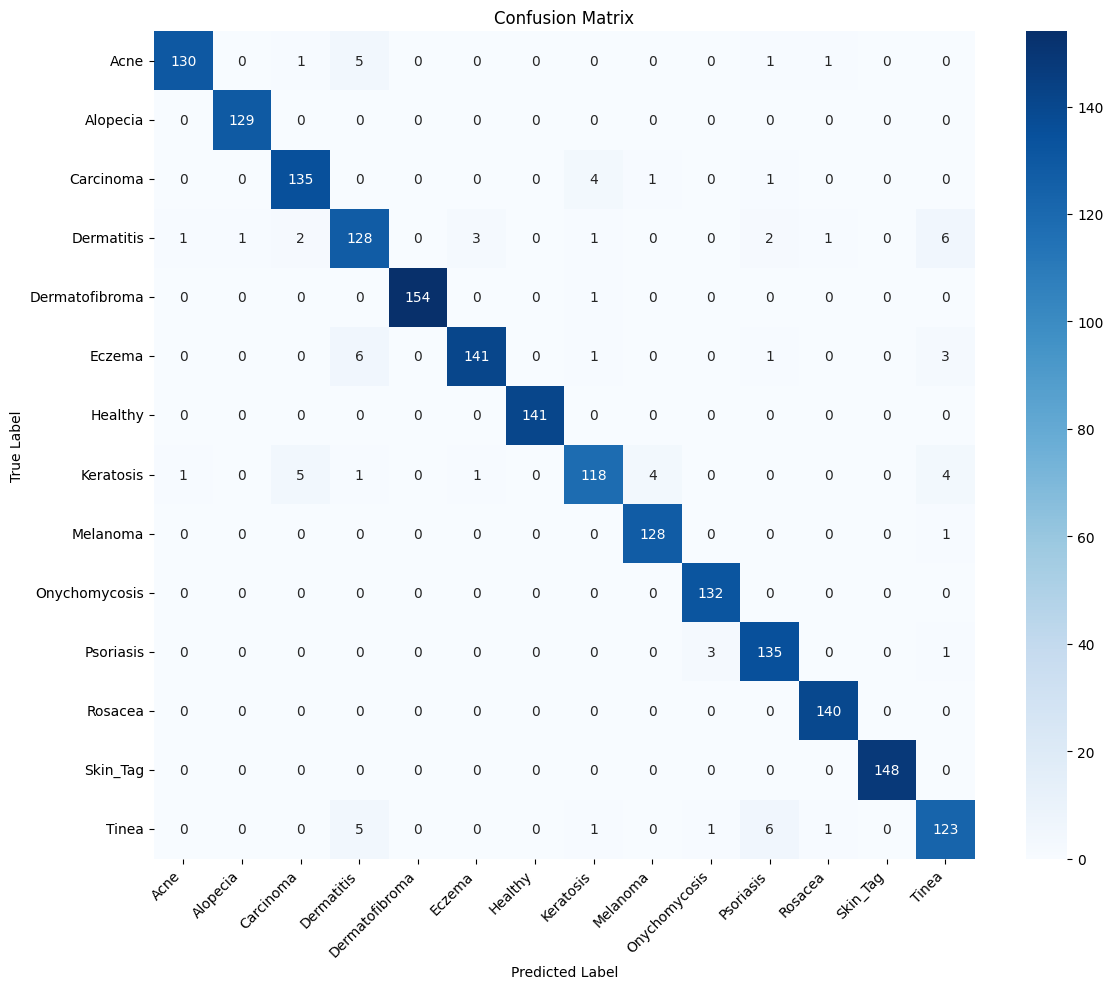

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# Get true labels and predictions
y_true = []
y_pred = []


# Collect all predictions
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### A validation set accuracy of 95% is pretty satisfying performance considering this was our benchmark model. It's interesting to note that the 2 classes performing the worst (Tinea and Dermatitis) were the most well-represented in our dataset before we expanded it using augmentation.

##### Finally, let's visualise the overall progress of the model.

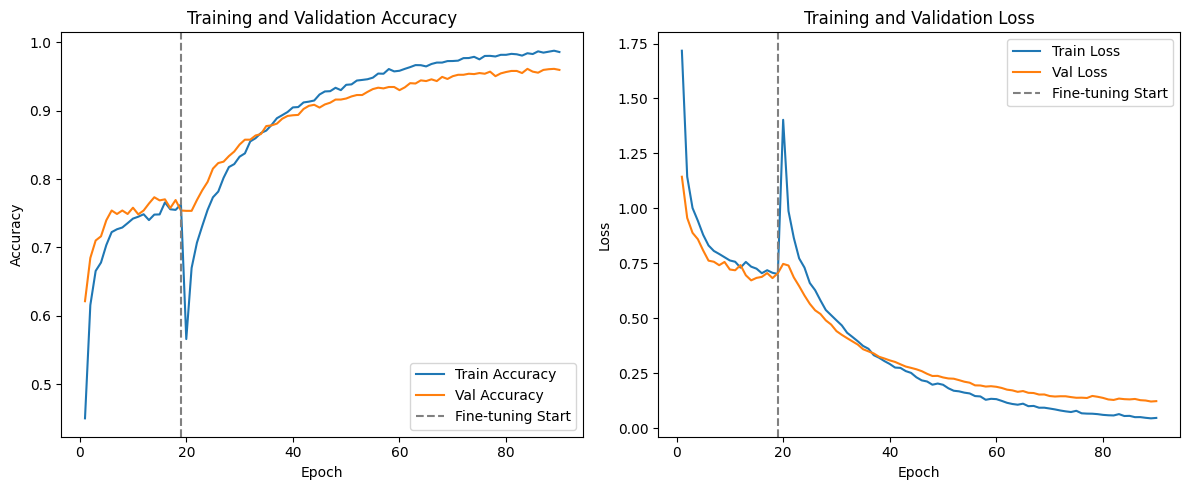

In [33]:
import matplotlib.pyplot as plt

# Combine all metrics
full_acc = (
    history.history['accuracy'] +
    history_fine.history['accuracy'] +
    history_more.history['accuracy']
)

full_val_acc = (
    history.history['val_accuracy'] +
    history_fine.history['val_accuracy'] +
    history_more.history['val_accuracy']
)

full_loss = (
    history.history['loss'] +
    history_fine.history['loss'] +
    history_more.history['loss']
)

full_val_loss = (
    history.history['val_loss'] +
    history_fine.history['val_loss'] +
    history_more.history['val_loss']
)

# Epochs
epochs = range(1, len(full_acc) + 1)
fine_tune_start = len(history.history['accuracy'])  # 1-based index

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, full_acc, label='Train Accuracy')
plt.plot(epochs, full_val_acc, label='Val Accuracy')
plt.axvline(x=fine_tune_start, color='gray', linestyle='--', label='Fine-tuning Start')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, full_loss, label='Train Loss')
plt.plot(epochs, full_val_loss, label='Val Loss')
plt.axvline(x=fine_tune_start, color='gray', linestyle='--', label='Fine-tuning Start')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


##### Finally, let's save our model to drive.

In [ ]:
!cp /content/mobilenetv2_finetuned.keras /content/drive/MyDrive/

### 7. ResNet50 (Pre-trained model performance)

##### One of the deeper, more accurate models and one of our personal favorites! 

##### ResNet50 is a powerful deep learning model used mainly for image classification and computer vision tasks. It is part of the ResNet (Residual Network) family, which was introduced by Microsoft Research in 2015.

##### The “50” in ResNet50 means it has 50 layers deep – making it a very deep convolutional neural network (CNN). However, unlike earlier deep networks that suffered from performance issues as they grew deeper, ResNet50 solves this problem using a clever idea called residual connections or skip connections. As neural networks get deeper, they can sometimes become worse at learning. ResNet50 avoids this problem by skipping some layers and allowing the network to learn the "difference" (or residual) between input and output, instead of learning everything from scratch. This makes training much easier and more accurate, even with very deep networks.

##### ResNet50 is made of Conv layers + BatchNorm + ReLU blocks. It has multiple residual blocks, each with a shortcut connection. These shortcuts allow the gradient to flow more easily during training, solving the vanishing gradient problem.

##### As before, we will first observe performance with base frozen, then proceed to finetuning.

##### After passing the input through a data augmentation layer, we will pass it through a resnet50-specific image preprocessing layer. Then it will go through the base model and finally a Global Average Pooling layer, a Dropout layer for regularization, and our custom softmax fully-connected layer.

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# Define input
inputs = Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
# Preprocess inputs using ResNet50-specific preprocessing
x = preprocess_input(inputs)

# Load base ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=None)

# Pass preprocessed input through the base model
x = base_model(x, training=False)

# Add classification head
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(14, activation='softmax')(x)

# Final model
modela = Model(inputs, output)

modela.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [17]:
modela.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_3 (Stack)     │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack_3[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 14)        │     28,686 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,616,398 (90.09 MB)

 Trainable params: 23,563,278 (89.89 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
checkpoint_cb = ModelCheckpoint(
    "new_resnet50.keras",        
    save_best_only=True,         
    monitor='val_loss',          
    mode='min',                  
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',          
    patience=5,                  
    restore_best_weights=True    
)

new_history = modela.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.5088 - loss: 1.5757
Epoch 1: val_loss improved from inf to 0.36752, saving model to new_resnet50.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 143s 352ms/step - accuracy: 0.5095 - loss: 1.5733 - val_accuracy: 0.8878 - val_loss: 0.3675
Epoch 2/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9219 - loss: 0.2387
Epoch 2: val_loss improved from 0.36752 to 0.22625, saving model to new_resnet50.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 80s 325ms/step - accuracy: 0.9220 - loss: 0.2386 - val_accuracy: 0.9265 - val_loss: 0.2262
Epoch 3/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9707 - loss: 0.0961
Epoch 3: val_loss did not improve from 0.22625
245/245 ━━━━━━━━━━━━━━━━━━━━ 79s 314ms/step - accuracy: 0.9707 - loss: 0.0961 - val_accuracy: 0.9367 - val_loss: 0.2288
Epoch 4/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9773 - loss: 0.0775
Epoch 4: val_loss improved from 0.22625 to 0.18557, saving model to ne

##### The model has almost surpassed our finetuned mobilenetv2... First we observe the analytics. Then let's keep going and finetune!

In [19]:
import numpy as np
from sklearn.metrics import classification_report

# Collect predictions and true labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = modela.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Get precision, recall, F1
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

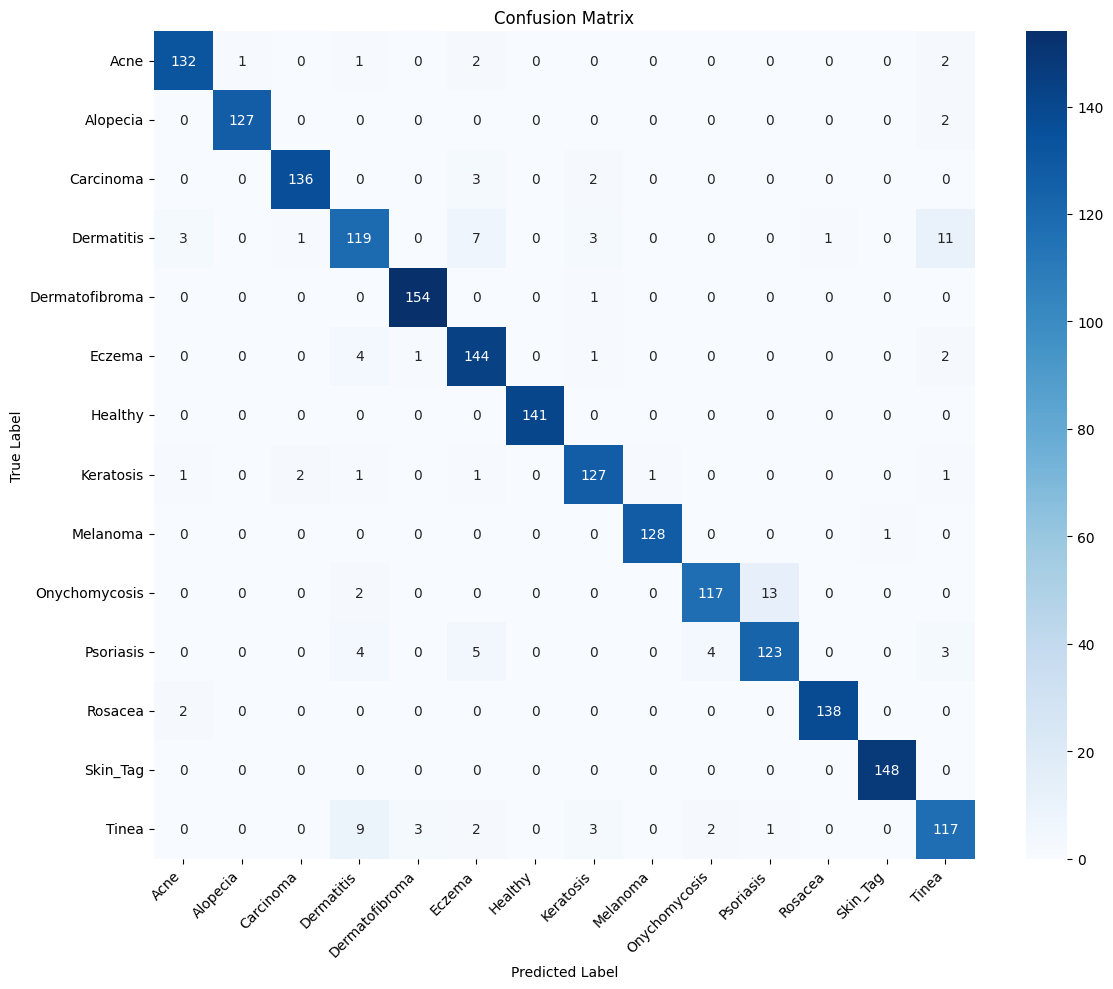

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# Get true labels and predictions
y_true = []
y_pred = []


# Collect all predictions
for images, labels in val_ds:
    preds = modela.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### We will need to save the model for calling it again.

In [ ]:
!cp /content/new_resnet50.keras /content/drive/MyDrive/

### 8. ResNet50 (Finetuning)

##### Now we use our silver bullet and unfreeze the 50 layers for finetuning!

In [ ]:
import tensorflow as tf

modela = tf.keras.models.load_model('/content/drive/MyDrive/new_resnet50.keras')

base_model = modela.get_layer('resnet50')

for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Recompile the model after changing trainable status
modela.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',  # or your original loss
    metrics=['accuracy']
)


modela.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_2 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_2[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_1[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 14)        │     28,686 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,616,398 (90.09 MB)

 Trainable params: 16,979,214 (64.77 MB)

 Non-trainable params: 6,637,184 (25.32 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint(
    "new_resnet50_finetuned.keras",          
    save_best_only=True,        
    monitor='val_loss',          
    mode='min',                  
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',          
    patience=5,                  
    restore_best_weights=True    
)

shin_history = modela.fit(
    train_ds,
    validation_data=val_ds,
    epochs=60,          # final target epoch
    initial_epoch=14,   # resumes from epoch 41
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 15/60
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9937 - loss: 0.0201
Epoch 15: val_loss improved from inf to 0.11568, saving model to new_resnet50_finetuned.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 87s 238ms/step - accuracy: 0.9937 - loss: 0.0200 - val_accuracy: 0.9730 - val_loss: 0.1157
Epoch 16/60
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9989 - loss: 0.0059
Epoch 16: val_loss improved from 0.11568 to 0.10924, saving model to new_resnet50_finetuned.keras
245/245 ━━━━━━━━━━━━━━━━━━━━ 49s 165ms/step - accuracy: 0.9989 - loss: 0.0059 - val_accuracy: 0.9735 - val_loss: 0.1092
Epoch 17/60
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9994 - loss: 0.0038
Epoch 17: val_loss did not improve from 0.10924
245/245 ━━━━━━━━━━━━━━━━━━━━ 39s 158ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9735 - val_loss: 0.1109
Epoch 18/60
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9997 - loss: 0.0029
Epoch 18: val_loss improved from 0.10924 to 

##### *Outstanding* performance! Our final saved model has a train accuracy of **99.9%** and a validation accuracy of **97.4%**! As it can be seen above, the train accuracy eventually hit a **100%**, but since val loss did not drop further, we did not save that model.

##### Let's see other metrics.

In [11]:
import numpy as np
from sklearn.metrics import classification_report

# Collect predictions and true labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = modela.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Get precision, recall, F1
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

##### As shown, even Tinea and Dermatitis classes have improved their F1 scores and 8 out of 13 disease classes have perfect recall scores (A key metric to improve in medical problems).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

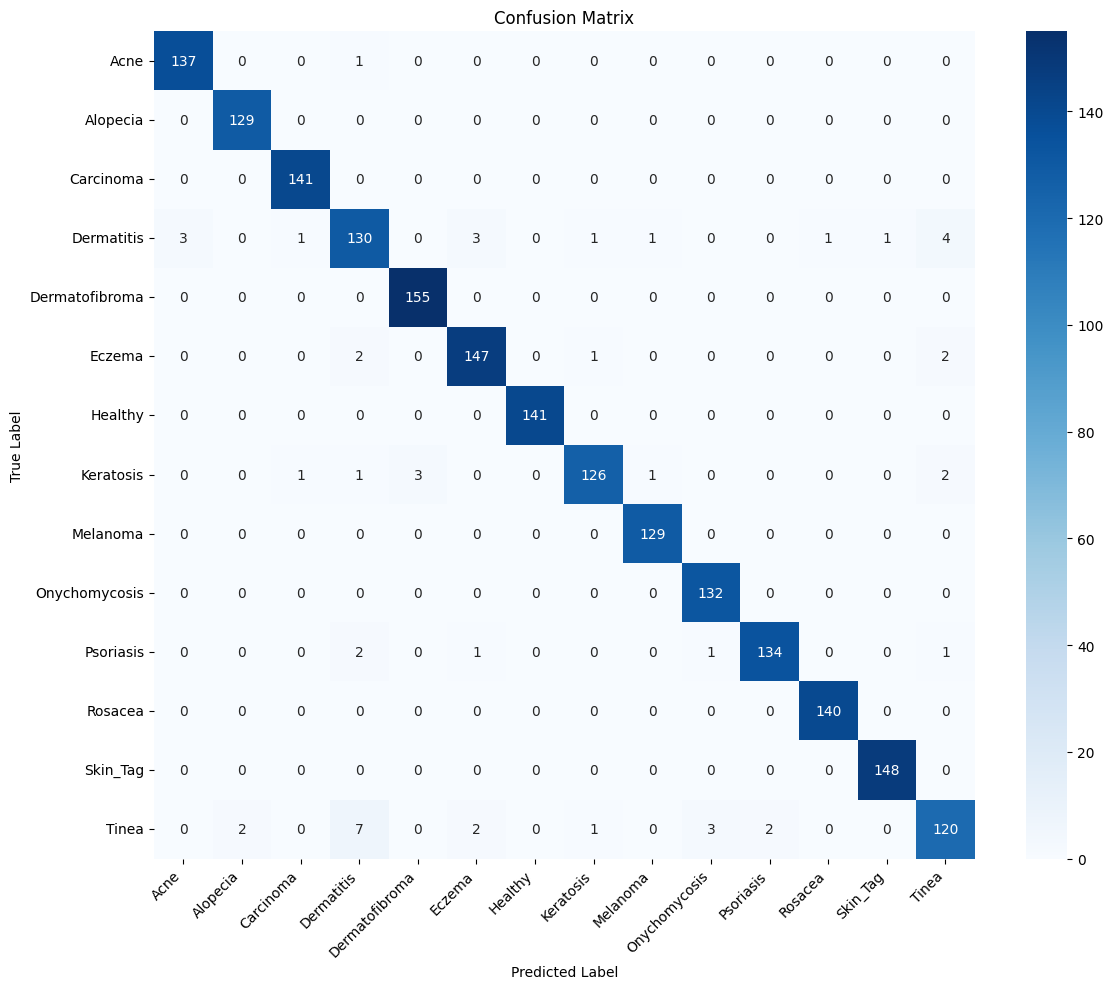

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get true labels and predictions
y_true = []
y_pred = []


# Collect all predictions
for images, labels in val_ds:
    preds = modela.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### Let's view the overall training progress of this behemoth of a model!

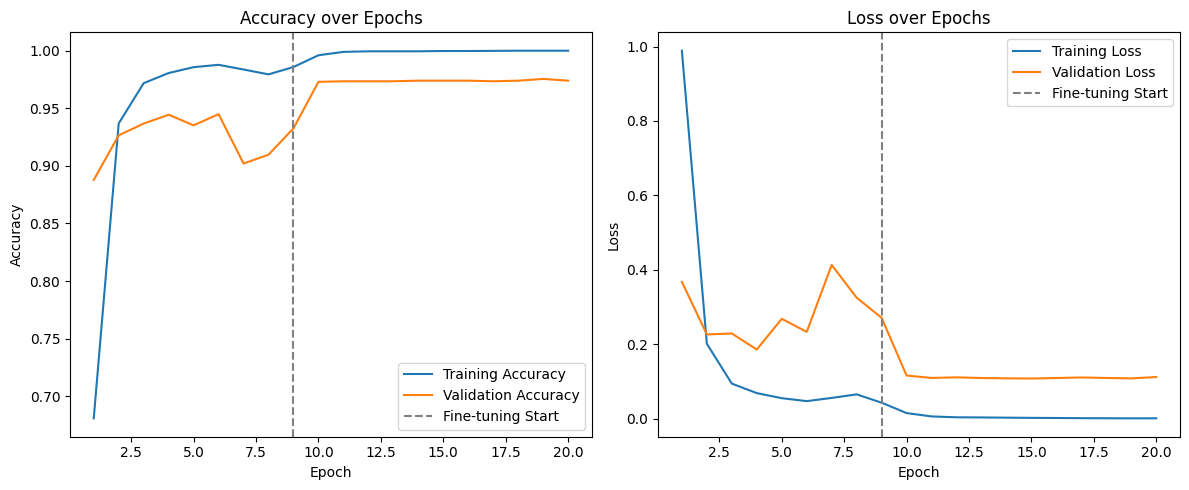

In [21]:
import matplotlib.pyplot as plt

# Combine metrics from both histories
full_acc = new_history.history['accuracy'] + shin_history.history['accuracy']
full_val_acc = new_history.history['val_accuracy'] + shin_history.history['val_accuracy']

full_loss = new_history.history['loss'] + shin_history.history['loss']
full_val_loss = new_history.history['val_loss'] + shin_history.history['val_loss']

# Total epochs
epochs = range(1, len(full_acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, full_acc, label='Training Accuracy')
plt.plot(epochs, full_val_acc, label='Validation Accuracy')
plt.axvline(x=len(new_history.history['accuracy']), color='gray', linestyle='--', label='Fine-tuning Start')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, full_loss, label='Training Loss')
plt.plot(epochs, full_val_loss, label='Validation Loss')
plt.axvline(x=len(new_history.history['loss']), color='gray', linestyle='--', label='Fine-tuning Start')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


##### Finally, we will save this model to Google Drive and serve it later from there in our Streamlit Web Application!

In [ ]:
!cp /content/new_resnet50_finetuned.keras /content/drive/MyDrive/

### 9. Conclusion

##### In this project, we successfully designed and implemented a deep learning–based skin disease classification model using Convolutional Neural Networks (CNNs) and transfer learning. Starting with the SD-198 dataset, we took a pragmatic and clinically relevant approach to restructure and simplify the dataset into 13 carefully chosen classes, reflecting the most common and diagnostically significant skin conditions that can be observed in everyday medical practice.

##### Key achievements of this project include:

- ##### **Data Curation:** We selected and consolidated skin disease classes into broader categories such as eczema, psoriasis, tinea, and alopecia, aligning the dataset with real-world usability for both patients and general practitioners. This included handling class imbalances and filtering medically rare or visually ambiguous conditions.

- ##### **Class Balancing with Augmentation:** We applied strategic data augmentation to enhance generalization and address class imbalance, ensuring our model doesn't become biased toward overrepresented conditions while maintaining clinical diversity within each class.

- ##### **Transfer Learning:** Leveraging pretrained CNN architectures like ResNet50 or MobileNetV2 (depending on the chosen experiment), we efficiently trained on our refined dataset, significantly reducing training time while improving accuracy and robustness.

- ##### **Practical Deployment:** The final model is well-suited for integration into a web or mobile application, offering a potential decision support tool for early-stage dermatological screening — especially in remote or resource-limited areas. It will be deployed as a streamlit web app.

##### Further ideas for improvement and development include:

- ##### Integration of Grad-CAM to visualise which areas of the image were most important in the CNN's classification decision. This will help rule out potential biases and help doctors trust the app.

- ##### Trying other models like EfficientNet or even the Inception Network (GoogleNet)

- ##### Expanding the dataset with more images and more classes.

##### This project demonstrates a valuable intersection between artificial intelligence and dermatology, proving that thoughtfully curated datasets combined with deep learning can produce models with real clinical utility. With further enhancements such as expert annotations, multi-label classification, or dermatoscopic image support, this tool could evolve into a robust aid for early detection and triage of skin conditions.
